In [1]:
import pandas as pd
import numpy as np
import cv2

In [2]:
path = '../TrainingData'

In [3]:
annots = pd.read_csv(path + '/Annotations/annotations.csv')
annots.head()

,filename,width,height,label,x_coord,y_coord,x_max,y_max
0,seg_18.jpg,2048,2048,cube,205.33,297.31,469.00,551.77
1,seg_18.jpg,2048,2048,cube,1155.75,297.31,1376.49,548.71
2,seg_258.jpg,2048,2048,cube,1177.21,656.01,1447.01,968.73
3,seg_258.jpg,2048,2048,cube,174.67,419.94,404.61,683.61
4,seg_24.jpg,2048,2048,cube,1174.15,726.53,1465.40,1063.77


In [4]:
print("Number of Images: ", len(annots.filename.unique()))
print("Number of Labels: ", len(annots.label.unique()))
print('Number of bounding boxes:',len(annots.iloc[:,4:]))

Number of Images:  99
Number of Labels:  1
Number of bounding boxes: 197


In [11]:
names = annots.filename.unique()[:12]

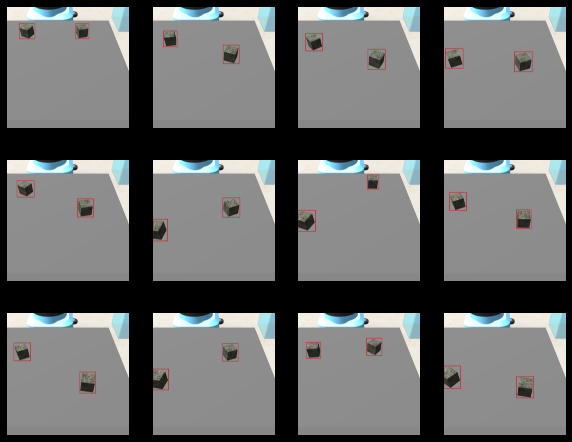

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt

figure = plt.figure(figsize=(10, 8), facecolor='black')
for i in range(1, 13):
    name = names[i-1]
    sel = annots[annots['filename'] == name][annots.columns[3:]]
    img = cv2.imread("{}/Images/{}".format(path, name))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    for j, row in sel.iterrows():
        cv2.rectangle(img, (int(row['x_coord']),int(row['y_coord'])), (int(row['x_max']),int(row['y_max'])),
        (225,0,0), 6)
    figure.add_subplot(3, 4, i)
    plt.axis("off")
    plt.imshow(img)